# Perceptron multicamadas -MLP com Keras
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
df = pd.read_csv('AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [3]:
data = data.astype('float32')

In [4]:
train = data[0:125, :]   
test = data[125:, :]     

In [5]:
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)   

In [6]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test    

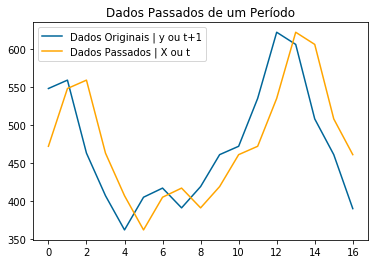

In [7]:
plt.plot(y_test, label='Dados Originais | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados Passados | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados Passados de um Período')
plt.show()

In [8]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Train on 123 samples
Epoch 1/200
123/123 - 1s - loss: 224791.1959
Epoch 2/200
123/123 - 0s - loss: 202597.0343
Epoch 3/200
123/123 - 0s - loss: 183526.5130
Epoch 4/200
123/123 - 0s - loss: 167339.8431
Epoch 5/200
123/123 - 0s - loss: 153426.8098
Epoch 6/200
123/123 - 0s - loss: 141387.7579
Epoch 7/200
123/123 - 0s - loss: 131149.6785
Epoch 8/200
123/123 - 0s - loss: 122234.4500
Epoch 9/200
123/123 - 0s - loss: 114578.2835
Epoch 10/200
123/123 - 0s - loss: 107899.4227
Epoch 11/200
123/123 - 0s - loss: 102025.1306
Epoch 12/200
123/123 - 0s - loss: 96810.5547
Epoch 13/200
123/123 - 0s - loss: 92221.1811
Epoch 14/200
123/123 - 0s - loss: 88123.5980
Epoch 15/200
123/123 - 0s - loss: 84408.2124
Epoch 16/200
123/123 - 0s - loss: 81056.9432
Epoch 17/200
123/123 - 0s - loss: 77912.6097
Epoch 18/200
123/123 - 0s - loss: 74958.7602
Epoch 19/200
123/123 - 0s - loss: 72108.0387
Epoch 20/200
123/123 - 0s - loss: 69282.7720
Epoch 21/200
123/123 - 0s - loss: 66493.5358
Epoch 22/200
123/123 - 0s - loss

In [9]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 831.14 MSE (28.83 RMSE)
Test Score: 3194.79 MSE (56.52 RMSE)


In [10]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

In [11]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [38]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

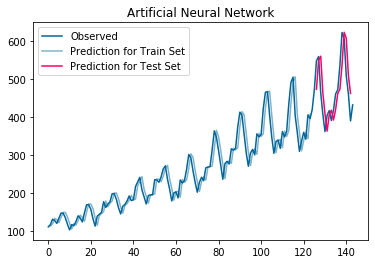

In [39]:
plt.plot(data, label='Observado', color='#006699');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='#ff0066');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()